**Question1**

State space: 

Will contain all the points that can be reached. Note that the mouth of snake is equivalen to its tail and the bottom of the ladder is equivalent to the top of the ladder.

$\mathcal{S} = \{ 38,2,3,14, ..., 79,99,100 \} $


Transition probability: 

For state with index $i$ of $\mathcal{S}$,

$$P(i+x|i) = \frac{1}{6}, \forall x \in \{1,2,3,4,5,6\}$$

**Question 2**

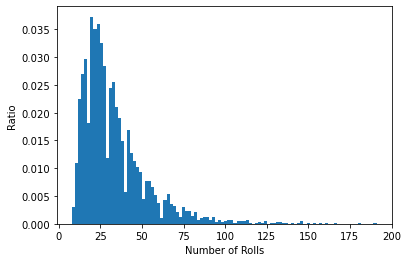

In [1]:
from dataclasses import dataclass
import sys
sys.path.append("../")
import itertools
from typing import Mapping, Dict
import numpy as np
from rl.distribution import Categorical, Constant, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess, NonTerminal


@dataclass(frozen=True)
class GameState:
    step: int


ladders = {80: 99, 71: 91, 51: 67, 28: 84, 21: 42, 9: 31, 4: 14,
           1: 38, 98: 79, 95: 75, 93: 73, 87: 24, 64: 60, 62: 19, 54: 34, 17: 7}
final_step = 100
# ladders = {}


class SnakesAndLadders(FiniteMarkovProcess[GameState]):

    def __init__(self):
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[GameState, FiniteDistribution[GameState]]:
        d: Dict[GameState, Categorical[GameState]] = {}
        for i in range(0, final_step):
            state_probs_map: Mapping[GameState, float] = {}
            for j in range(1, 7):
                nextStep = ladders[i+j] if i+j in ladders else i+j
                if nextStep < final_step:
                    if GameState(nextStep) in state_probs_map:
                        state_probs_map[GameState(nextStep)] += float(1/6)
                    else:
                        state_probs_map[GameState(nextStep)] = float(1/6)
                else:
                    state_probs_map[GameState(final_step)] = float((7-j)/6)
                    break
            d[GameState(i)] = Categorical(state_probs_map)
            # print(i, d[GameState(i)])
        return d


if __name__ == '__main__':
    snl = SnakesAndLadders()
    start_dist = Constant(NonTerminal(GameState(0)))
    xyz = [len(np.fromiter((s.state.step for s in itertools.islice(
        snl.simulate(start_dist), 1000)), float)) for i in range(5000)]
    #print(xyz)
    from matplotlib import pyplot as plt
    plt.hist(xyz, bins = 100, density = True)
    plt.xlabel("Number of Rolls")
    plt.ylabel("Ratio")
    plt.show()

**Question 3**

Let $E[n]$ denote the expected number of jumps when the number of lilypads is $n$. 

$$E[n] = 1 + \frac{E[n-1]}{n} + \frac{E[n-1]}{n} + ... + \frac{E[1]}{n}$$
$$E[n-1] = 1 + \frac{E[n-2]}{n-1} + \frac{E[n-3]}{n-1} + ... + \frac{E[1]}{n-1}$$

On subtracting both we get

$$E[n] = E[n-1] + \frac{1}{n}$$

On solving this recursion with $E[1] = 1$, we get 

$$E[n] = \sum_{i=1}^{n} \frac{1}{i}$$



**Question 4**

We set the reward = 1 for every transition and gamma = 1. The value function for State s = 1 will be the expected number of rolls of dice to complete the game.

In [5]:
import sys
sys.path.append("../")
from dataclasses import dataclass
from typing import Tuple, Dict, Mapping
from rl.markov_process import MarkovRewardProcess
from rl.markov_process import FiniteMarkovRewardProcess
from rl.markov_process import State, NonTerminal
from scipy.stats import poisson
from rl.distribution import SampledDistribution, Categorical, \
    FiniteDistribution
import numpy as np


@dataclass(frozen=True)
class GameState:
    step: int


ladders = {80: 99, 71: 91, 51: 67, 28: 84, 21: 42, 9: 31, 4: 14,
           1: 38, 98: 79, 95: 75, 93: 73, 87: 24, 64: 60, 62: 19, 54: 34, 17: 7}
final_step = 100
# ladders = {}


class SnakesAndLadders(FiniteMarkovRewardProcess[GameState]):

    def __init__(self):
        super().__init__(self.get_transition_reward_map())

    def get_transition_reward_map(self) -> \
            Mapping[GameState, FiniteDistribution[Tuple[GameState, float]]]:
        d: Dict[GameState, Categorical[Tuple[GameState, float]]] = {}
        for i in range(0, final_step):
            state_probs_map: Mapping[GameState, float] = {}
            for j in range(1, 7):
                nextStep = ladders[i+j] if i+j in ladders else i+j
                if nextStep < final_step:
                    if (GameState(nextStep), 1) in state_probs_map:
                        state_probs_map[(GameState(nextStep), 1)] += float(1/6)
                    else:
                        state_probs_map[(GameState(nextStep), 1)] = float(1/6)
                else:
                    state_probs_map[(GameState(final_step), 1)
                                    ] = float((7-j)/6)
                    break
            d[GameState(i)] = Categorical(state_probs_map)
            # print(i, d[GameState(i)])
        return d


if __name__ == '__main__':
    snl = SnakesAndLadders()
    #start_dist = Constant(NonTerminal(GameState(0)))
    # xyz = np.fromiter((s.state.step for s in itertools.islice(
    #    snl.simulate(start_dist), 1000)), float)
    snl.display_value_function(gamma=1)
    


{NonTerminal(state=GameState(step=0)): 32.498,
 NonTerminal(state=GameState(step=1)): 33.306,
 NonTerminal(state=GameState(step=2)): 33.127,
 NonTerminal(state=GameState(step=3)): 32.589,
 NonTerminal(state=GameState(step=4)): 32.772,
 NonTerminal(state=GameState(step=5)): 32.646,
 NonTerminal(state=GameState(step=6)): 32.475,
 NonTerminal(state=GameState(step=7)): 32.274,
 NonTerminal(state=GameState(step=8)): 32.053,
 NonTerminal(state=GameState(step=9)): 32.175,
 NonTerminal(state=GameState(step=10)): 31.823,
 NonTerminal(state=GameState(step=11)): 31.888,
 NonTerminal(state=GameState(step=12)): 31.452,
 NonTerminal(state=GameState(step=13)): 31.066,
 NonTerminal(state=GameState(step=14)): 30.728,
 NonTerminal(state=GameState(step=15)): 30.094,
 NonTerminal(state=GameState(step=16)): 29.714,
 NonTerminal(state=GameState(step=17)): 28.967,
 NonTerminal(state=GameState(step=18)): 28.837,
 NonTerminal(state=GameState(step=19)): 28.752,
 NonTerminal(state=GameState(step=20)): 28.696,
 N